- 당뇨병 데이터셋 with
- feature 마다 영향력 확인 
- test_size = 0.1
- LinearRegression vs DecisionTreeRegression 
- Model 성능 : MSE

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
    

In [3]:
from sklearn.datasets import load_diabetes
dia = load_diabetes()

In [4]:
df = pd.DataFrame(dia.data, columns= dia.feature_names )
df['target'] = dia.target
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


In [5]:
features = df.columns[:-1]
print(features)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


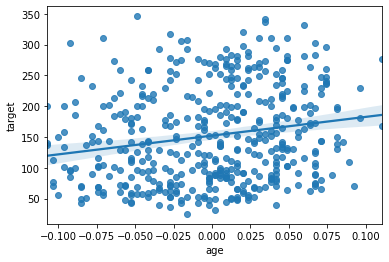

In [6]:
sns.regplot(x='age', y='target', data=df)
plt.show()

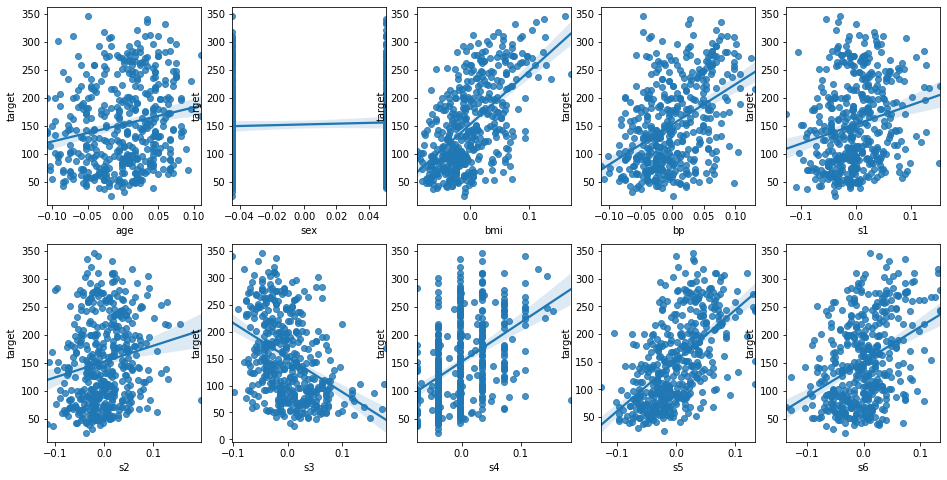

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(16,8))
for i, feature in enumerate (features):
    row, col = i//5, i%5                        # 얘는 뭘까? 
    sns.regplot(x=feature, y ='target', data=df, ax = axs[row][col])

    # bmi, s3, s5 회귀선에 몰려있고 상관관계 높아 보임 

- 실제 feature와 target의 상관관계

In [8]:
X = df['age'].values.reshape(-1,1)
y = dia.target 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df['age'].values.reshape(-1,1), dia.target, test_size=0.1, random_state=2021
)

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test, y_test)    # ??? 

-0.0810485576873976

In [11]:
for feature in dia.feature_names: 
    X_train, X_test, y_train, y_test = train_test_split(
        df[feature].values.reshape(-1,1), dia.target, test_size=0.1, random_state=2021)


    lr = LinearRegression()
    lr.fit(X_train,y_train)
    print(lr.score(X_test, y_test))

-0.0810485576873976
-1.9145959564426107e-06
0.17874580965139086
0.22296036461624136
-0.06864321584371114
0.008026163130021469
0.11861843073471134
0.07464724787166677
0.05555895820745016
0.12182329052160201


In [12]:
for feature in dia.feature_names: 
    X_train, X_test, y_train, y_test = train_test_split(
        df[feature].values.reshape(-1,1), dia.target, test_size=0.1, random_state=2021)


    lr = LinearRegression()
    lr.fit(X_train,y_train)
    r2 = lr.score(X_test, y_test)
    print(f'{feature}:\t{r2:.4f}')

    # bp > bmi > s6 > s3 상관관계 높다 

age:	-0.0810
sex:	-0.0000
bmi:	0.1787
bp:	0.2230
s1:	-0.0686
s2:	0.0080
s3:	0.1186
s4:	0.0746
s5:	0.0556
s6:	0.1218


In [13]:
# 여기까지는 한 개 한 개에 대해 구한 단순선형회귀 

- 다중선형 회귀 : LinearRegression

In [14]:
# 다중선형회귀 위해서 학습, 테스트 다시 나눠주어야 합니다! 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    dia.data, dia.target, test_size=0.1, random_state=2021)

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)

In [30]:
# 회귀식 기울기와 절편
lr.coef_

array([ -14.06014661, -246.92791992,  547.80956855,  286.58708365,
       -656.22582592,  364.21134557,   60.28474402,  182.53318837,
        702.08292875,   68.21197298])

In [31]:
lr.intercept_

151.67372554450927

- 테스트 데이터

In [32]:
dia.data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [33]:
# 실제 값 
dia.target[0]

151.0

In [34]:
# 기울기와 절편을 이용한 예측값 
np.dot(lr.coef_ , dia.data[0]) + lr.intercept_

204.71273071737895

In [35]:
for i in range(5):
    pred = np.dot(lr.coef_ , dia.data[i]) + lr.intercept_
    Y = dia.target[i]
    print(f'예측값 : {pred:.2f} 실제값 : {Y}')


예측값 : 204.71 실제값 : 151.0
예측값 : 68.56 실제값 : 75.0
예측값 : 175.97 실제값 : 141.0
예측값 : 167.58 실제값 : 206.0
예측값 : 126.43 실제값 : 135.0


- 성능평가 MSE

In [42]:
from sklearn.metrics import mean_squared_error    
mse = mean_squared_error(y_test, pred_m)
mse

2370.1978745563165

In [ ]:
# 이렇게 하는 게 맞나 


- 다중선형회귀2 : DecisionTreeRegressor

In [17]:
# 선형을 그리는 방법이 아닌 결정트리, 기울기 절편 구할 수 X 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    dia.data, dia.target, test_size=0.1, random_state=2021)

In [46]:
from sklearn.tree import DecisionTreeRegressor 
dtc = DecisionTreeRegressor()
dtc.fit(X_train, y_train)

DecisionTreeRegressor()

In [53]:
# 결정트리는 기울기, 절편 구할 수 없습니다.

In [51]:
pred_d = dtc.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error    
mse = mean_squared_error(y_test, pred_d)
mse

7326.2

- LinearRegression : 기울기, 절편 통해 예측값 
- 결정트리 : predict